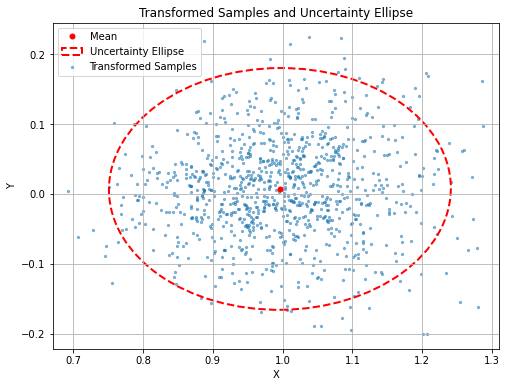

In [7]:
# Author: Arash 
# Date Published: Aug 18, 2023
# Purpose: Simulation script for part (e) of assignment 1 solutions for ME8135
# Language: Python

# Importing required packages 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Parameter initialization 
rho = 1.0  # meters
theta = 0.5 * np.pi / 180.0  # radians
sigma_rho_rho = 0.01
sigma_rho_theta = 0.0
sigma_theta_theta = 0.005
sample_size = 1000 # given in problem statement 

# Covariance matrix of x
Sigma_x = np.array([[sigma_rho_rho, sigma_rho_theta],
                    [sigma_rho_theta, sigma_theta_theta]])

# Nonlinear transformation function definition 
def f(x):
    rho = x[0]
    theta = x[1]
    return np.array([rho * np.cos(theta), rho * np.sin(theta)])

# Monte Carlo simulation
samples_x = np.random.multivariate_normal([rho, theta], Sigma_x, size=sample_size)
samples_y = np.array([f(x) for x in samples_x])

# Covariance matrix of y using the derived expression in part (d)
cos_theta = np.cos(theta)
sin_theta = np.sin(theta)
covariance_y = np.array([[cos_theta, -rho * sin_theta],
                         [sin_theta, rho * cos_theta]]) @ Sigma_x @ np.array([[cos_theta, sin_theta],
                                                                              [-rho * sin_theta, rho * cos_theta]])

# Mean of the transformed samples
mean_y = np.mean(samples_y, axis=0)

# Finding the ellipse parameters
a = np.sqrt(5.991) # 95% confidence level 
eigenvalues, eigenvectors = np.linalg.eig(covariance_y)
angle = np.arctan2(eigenvectors[1, 0], eigenvectors[0, 0])
width = 2 * np.sqrt(eigenvalues[0]) * a
height = 2 * np.sqrt(eigenvalues[1]) * a

# Plot settings 
plt.figure(figsize=(8, 6))
plt.scatter(samples_y[:, 0], samples_y[:, 1], s=5, alpha=0.5, label='Transformed Samples')
plt.plot(mean_y[0], mean_y[1], 'ro', label='Mean', markersize=5)
ellipse = patches.Ellipse(mean_y, width, height, angle=np.degrees(angle), fill=False,
                          edgecolor='r', linestyle='--', linewidth=2, label='Uncertainty Ellipse')

plt.gca().add_patch(ellipse)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Transformed Samples and Uncertainty Ellipse')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()